<a href="https://colab.research.google.com/github/Amit198181/JBVNL/blob/main/Model_predicting_Total_Assessment_Random_Forest_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("bb.xls - Sheet1.csv")

# Define target and features
TARGET_COL = 'TOTAL_ASSESSMENT'
FEATURE_COLS = [
    'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR', 'NO_OF_DAYS',
    'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
]

# Ensure all relevant columns exist for cleaning and selection
all_cols = FEATURE_COLS + [TARGET_COL]
df_ml = df[all_cols].copy()

# Convert numerical columns to numeric, coercing errors
for col in FEATURE_COLS[:-1] + [TARGET_COL]: # Exclude TARIFF_CODE
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

# Separate features and target
X = df_ml.drop(TARGET_COL, axis=1)
Y = df_ml[TARGET_COL]

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Handle numerical missing values (Imputation: mean)
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Handle categorical features (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Align the index after processing
df_processed = X.copy()
df_processed[TARGET_COL] = Y

# Drop rows where the TARGET is still NaN
df_processed.dropna(subset=[TARGET_COL], inplace=True)
Y = df_processed[TARGET_COL]
X = df_processed.drop(TARGET_COL, axis=1)

# Drop any remaining NaNs in features (if any slipped through)
X.dropna(inplace=True)
Y = Y[X.index] # Align Y after dropping X rows

# Scaling (Standardization)
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model Selection and Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)
model.fit(X_train, Y_train)

# 5. Evaluation
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 1284

### Create Dummy CSV File

In [12]:
import pandas as pd
import numpy as np
import os

FILE_NAME = "bb.xls - Sheet1.csv"

# Define column names
COLUMNS = [
    'TOTAL_ASSESSMENT', 'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR',
    'NO_OF_DAYS', 'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
]

num_rows = 150 # A reasonable number of rows for dummy data

# Create dummy data
data = {
    'TOTAL_ASSESSMENT': np.random.uniform(500, 5000, num_rows),
    'CONTRACTED_LOAD': np.random.uniform(10, 100, num_rows),
    'MDI': np.random.uniform(5, 50, num_rows),
    'BILLED_UNITS': np.random.uniform(100, 1000, num_rows),
    'LOAD_FACTOR': np.random.uniform(0.3, 0.9, num_rows),
    'NO_OF_DAYS': np.random.randint(28, 31, num_rows),
    'ENERGY_CHARGE': np.random.uniform(200, 2000, num_rows),
    'FIXED_CHG': np.random.uniform(50, 500, num_rows),
    'DEMAND_CHG': np.random.uniform(10, 100, num_rows),
    'TARIFF_CODE': np.random.choice(['T1', 'T2', 'T3', 'T4'], num_rows)
}

# Introduce some NaN values to simulate real-world data issues for testing
for col in ['MDI', 'LOAD_FACTOR', 'ENERGY_CHARGE']:
    nan_indices = np.random.choice(num_rows, int(num_rows * 0.05), replace=False)
    data[col][nan_indices] = np.nan

df_dummy = pd.DataFrame(data)

# Save the dummy DataFrame to CSV
df_dummy.to_csv(FILE_NAME, index=False)
print(f"Dummy file '{FILE_NAME}' created successfully.")

# Display the first few rows of the dummy DataFrame to confirm
print("First 5 rows of the created dummy DataFrame:")
display(df_dummy.head())

Dummy file 'bb.xls - Sheet1.csv' created successfully.
First 5 rows of the created dummy DataFrame:


,TOTAL_ASSESSMENT,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TARIFF_CODE
0,2720.441197,42.749503,48.496421,754.034087,0.885494,29,581.001448,320.912643,56.052438,T4
1,1759.506694,20.020419,15.674232,256.603900,0.322888,30,451.775934,310.760445,89.766568,T4
2,1586.424740,97.183614,29.084731,597.489195,0.459878,29,719.071192,400.786065,55.596597,T3
3,4342.795592,49.724527,45.952463,165.776782,NaN,30,996.465687,146.180046,93.199294,T4
4,4946.061549,36.863214,26.017674,631.194001,0.377158,30,1994.123498,160.699967,90.957216,T2


### Check for Missing Values

In [8]:
print('Missing values per column:')
display(df_ml.isnull().sum())

Missing values per column:


,0
CONTRACTED_LOAD,0
MDI,0
BILLED_UNITS,0
LOAD_FACTOR,0
NO_OF_DAYS,0
ENERGY_CHARGE,0
FIXED_CHG,0
DEMAND_CHG,0
TARIFF_CODE,0
TOTAL_ASSESSMENT,0


### Check for Duplicate Rows

In [9]:
print(f'Number of duplicate rows: {df_ml.duplicated().sum()}')

Number of duplicate rows: 0


### Display Data Types and Non-Null Counts

In [10]:
print('DataFrame Info (data types and non-null counts):')
df_ml.info()

DataFrame Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CONTRACTED_LOAD   2171 non-null   int64  
 1   MDI               2171 non-null   float64
 2   BILLED_UNITS      2171 non-null   int64  
 3   LOAD_FACTOR       2171 non-null   float64
 4   NO_OF_DAYS        2171 non-null   float64
 5   ENERGY_CHARGE     2171 non-null   float64
 6   FIXED_CHG         2171 non-null   float64
 7   DEMAND_CHG        2171 non-null   float64
 8   TARIFF_CODE       2171 non-null   object 
 9   TOTAL_ASSESSMENT  2171 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 169.7+ KB


### Display Descriptive Statistics for Numerical Columns

In [11]:
print('Descriptive statistics for numerical columns:')
display(df_ml.describe())

Descriptive statistics for numerical columns:


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TOTAL_ASSESSMENT
count,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03,2171.000000,2171.000000,2.171000e+03
mean,23.894519,16.803371,4277.658222,0.770046,34.400624,2.547170e+04,87.853989,5670.503947,3.379276e+04
std,124.779512,98.219172,32896.884939,5.114504,16.624811,1.859164e+05,66.146753,41212.746061,2.375264e+05
min,3.000000,0.000000,1.000000,0.000000,21.054150,6.850000e+00,0.000000,0.000000,-2.175909e+04
25%,4.000000,2.164000,308.000000,0.000000,29.075650,2.109800e+03,78.900000,0.000000,2.383365e+03
50%,5.000000,4.000000,470.000000,0.000000,32.082950,3.212650e+03,98.620000,0.000000,3.603900e+03
75%,6.000000,5.000000,921.500000,0.000000,34.089850,6.267750e+03,108.480000,0.000000,7.100280e+03
max,2500.000000,1800.000000,805986.000000,74.820000,487.277150,4.231426e+06,1512.180000,750000.000000,5.263645e+06


# Task
Load the data from "bb.xls - Sheet1.csv". If the file is not found, create a dummy CSV file with the expected columns and random data. Then, train a Random Forest Regressor model, evaluate its performance using R-squared and Mean Absolute Error, and review the results.

## Load Data and Handle File Not Found

### Subtask:
Attempt to load the data from 'bb.xls - Sheet1.csv'. If the file is not found, create a dummy CSV file with the expected columns and random data to enable further execution.


**Reasoning**:
The current code fails due to a `FileNotFoundError`. I will implement a `try-except` block to gracefully handle this error. If the file is not found, a dummy CSV will be created with random data, ensuring the notebook can proceed with subsequent data processing steps.



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os

# 1. Load data
FILE_NAME = "bb.xls - Sheet1.csv"

try:
    df = pd.read_csv(FILE_NAME)
    print(f"Successfully loaded {FILE_NAME}.")
except FileNotFoundError:
    print(f"File '{FILE_NAME}' not found. Creating a dummy file.")

    # Define column names
    COLUMNS = [
        'TOTAL_ASSESSMENT', 'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR',
        'NO_OF_DAYS', 'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
    ]

    num_rows = 150 # A reasonable number of rows for dummy data

    # Create dummy data
    data = {
        'TOTAL_ASSESSMENT': np.random.uniform(500, 5000, num_rows),
        'CONTRACTED_LOAD': np.random.uniform(10, 100, num_rows),
        'MDI': np.random.uniform(5, 50, num_rows),
        'BILLED_UNITS': np.random.uniform(100, 1000, num_rows),
        'LOAD_FACTOR': np.random.uniform(0.3, 0.9, num_rows),
        'NO_OF_DAYS': np.random.randint(28, 31, num_rows),
        'ENERGY_CHARGE': np.random.uniform(200, 2000, num_rows),
        'FIXED_CHG': np.random.uniform(50, 500, num_rows),
        'DEMAND_CHG': np.random.uniform(10, 100, num_rows),
        'TARIFF_CODE': np.random.choice(['T1', 'T2', 'T3', 'T4'], num_rows)
    }

    # Introduce some NaN values to simulate real-world data issues for testing
    for col in ['MDI', 'LOAD_FACTOR', 'ENERGY_CHARGE']:
        nan_indices = np.random.choice(num_rows, int(num_rows * 0.05), replace=False)
        data[col][nan_indices] = np.nan

    df = pd.DataFrame(data)

    # Save the dummy DataFrame to CSV
    df.to_csv(FILE_NAME, index=False)
    print(f"Dummy file '{FILE_NAME}' created and loaded successfully.")

# Define target and features
TARGET_COL = 'TOTAL_ASSESSMENT'
FEATURE_COLS = [
    'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR', 'NO_OF_DAYS',
    'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
]

# Ensure all relevant columns exist for cleaning and selection
all_cols = FEATURE_COLS + [TARGET_COL]
df_ml = df[all_cols].copy()

# Convert numerical columns to numeric, coercing errors
for col in FEATURE_COLS[:-1] + [TARGET_COL]: # Exclude TARIFF_CODE
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

# Separate features and target
X = df_ml.drop(TARGET_COL, axis=1)
Y = df_ml[TARGET_COL]

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Handle numerical missing values (Imputation: mean)
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Handle categorical features (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Align the index after processing
df_processed = X.copy()
df_processed[TARGET_COL] = Y

# Drop rows where the TARGET is still NaN
df_processed.dropna(subset=[TARGET_COL], inplace=True)
Y = df_processed[TARGET_COL]
X = df_processed.drop(TARGET_COL, axis=1)

# Drop any remaining NaNs in features (if any slipped through)
X.dropna(inplace=True)
Y = Y[X.index] # Align Y after dropping X rows

# Scaling (Standardization)
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model Selection and Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)
model.fit(X_train, Y_train)

# 5. Evaluation
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 1284

**Reasoning**:
The `ParserError` indicates an issue with `pd.read_csv` when trying to parse the existing CSV file, likely due to malformed lines or specific formatting that the default C engine cannot handle. Using `engine='python'` can provide a more robust parsing mechanism for such cases.



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os

# 1. Load data
FILE_NAME = "bb.xls - Sheet1.csv"

try:
    # Attempt to load the file with the python engine for better robustness against parsing errors
    df = pd.read_csv(FILE_NAME, engine='python')
    print(f"Successfully loaded {FILE_NAME}.")
except FileNotFoundError:
    print(f"File '{FILE_NAME}' not found. Creating a dummy file.")

    # Define column names
    COLUMNS = [
        'TOTAL_ASSESSMENT', 'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR',
        'NO_OF_DAYS', 'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
    ]

    num_rows = 150 # A reasonable number of rows for dummy data

    # Create dummy data
    data = {
        'TOTAL_ASSESSMENT': np.random.uniform(500, 5000, num_rows),
        'CONTRACTED_LOAD': np.random.uniform(10, 100, num_rows),
        'MDI': np.random.uniform(5, 50, num_rows),
        'BILLED_UNITS': np.random.uniform(100, 1000, num_rows),
        'LOAD_FACTOR': np.random.uniform(0.3, 0.9, num_rows),
        'NO_OF_DAYS': np.random.randint(28, 31, num_rows),
        'ENERGY_CHARGE': np.random.uniform(200, 2000, num_rows),
        'FIXED_CHG': np.random.uniform(50, 500, num_rows),
        'DEMAND_CHG': np.random.uniform(10, 100, num_rows),
        'TARIFF_CODE': np.random.choice(['T1', 'T2', 'T3', 'T4'], num_rows)
    }

    # Introduce some NaN values to simulate real-world data issues for testing
    for col in ['MDI', 'LOAD_FACTOR', 'ENERGY_CHARGE']:
        nan_indices = np.random.choice(num_rows, int(num_rows * 0.05), replace=False)
        data[col][nan_indices] = np.nan

    df = pd.DataFrame(data)

    # Save the dummy DataFrame to CSV
    df.to_csv(FILE_NAME, index=False)
    print(f"Dummy file '{FILE_NAME}' created and loaded successfully.")
except pd.errors.ParserError as e:
    print(f"ParserError encountered while reading '{FILE_NAME}': {e}")
    print("Attempting to proceed with dummy data generation.")

    # Define column names (duplicated from above for clarity in this error handling path)
    COLUMNS = [
        'TOTAL_ASSESSMENT', 'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR',
        'NO_OF_DAYS', 'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
    ]
    num_rows = 150
    data = {
        'TOTAL_ASSESSMENT': np.random.uniform(500, 5000, num_rows),
        'CONTRACTED_LOAD': np.random.uniform(10, 100, num_rows),
        'MDI': np.random.uniform(5, 50, num_rows),
        'BILLED_UNITS': np.random.uniform(100, 1000, num_rows),
        'LOAD_FACTOR': np.random.uniform(0.3, 0.9, num_rows),
        'NO_OF_DAYS': np.random.randint(28, 31, num_rows),
        'ENERGY_CHARGE': np.random.uniform(200, 2000, num_rows),
        'FIXED_CHG': np.random.uniform(50, 500, num_rows),
        'DEMAND_CHG': np.random.uniform(10, 100, num_rows),
        'TARIFF_CODE': np.random.choice(['T1', 'T2', 'T3', 'T4'], num_rows)
    }
    for col in ['MDI', 'LOAD_FACTOR', 'ENERGY_CHARGE']:
        nan_indices = np.random.choice(num_rows, int(num_rows * 0.05), replace=False)
        data[col][nan_indices] = np.nan
    df = pd.DataFrame(data)
    df.to_csv(FILE_NAME, index=False)
    print(f"Dummy file '{FILE_NAME}' created and loaded successfully after ParserError.")

# Define target and features
TARGET_COL = 'TOTAL_ASSESSMENT'
FEATURE_COLS = [
    'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR', 'NO_OF_DAYS',
    'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
]

# Ensure all relevant columns exist for cleaning and selection
all_cols = FEATURE_COLS + [TARGET_COL]
df_ml = df[all_cols].copy()

# Convert numerical columns to numeric, coercing errors
for col in FEATURE_COLS[:-1] + [TARGET_COL]: # Exclude TARIFF_CODE
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

# Separate features and target
X = df_ml.drop(TARGET_COL, axis=1)
Y = df_ml[TARGET_COL]

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Handle numerical missing values (Imputation: mean)
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Handle categorical features (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Align the index after processing
df_processed = X.copy()
df_processed[TARGET_COL] = Y

# Drop rows where the TARGET is still NaN
df_processed.dropna(subset=[TARGET_COL], inplace=True)
Y = df_processed[TARGET_COL]
X = df_processed.drop(TARGET_COL, axis=1)

# Drop any remaining NaNs in features (if any slipped through)
X.dropna(inplace=True)
Y = Y[X.index] # Align Y after dropping X rows

# Scaling (Standardization)
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model Selection and Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)
model.fit(X_train, Y_train)

# 5. Evaluation
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R-squared (R2) Score: {r2:.4f}")
print(f

SyntaxError: incomplete input (ipython-input-524643789.py, line 142)

**Reasoning**:
The previous code block failed with a `SyntaxError: incomplete input` because the final `print` statement was cut off. I need to complete the print statement for Mean Absolute Error.



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os

# 1. Load data
FILE_NAME = "bb.xls - Sheet1.csv"

try:
    # Attempt to load the file with the python engine for better robustness against parsing errors
    df = pd.read_csv(FILE_NAME, engine='python')
    print(f"Successfully loaded {FILE_NAME}.")
except FileNotFoundError:
    print(f"File '{FILE_NAME}' not found. Creating a dummy file.")

    # Define column names
    COLUMNS = [
        'TOTAL_ASSESSMENT', 'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR',
        'NO_OF_DAYS', 'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
    ]

    num_rows = 150 # A reasonable number of rows for dummy data

    # Create dummy data
    data = {
        'TOTAL_ASSESSMENT': np.random.uniform(500, 5000, num_rows),
        'CONTRACTED_LOAD': np.random.uniform(10, 100, num_rows),
        'MDI': np.random.uniform(5, 50, num_rows),
        'BILLED_UNITS': np.random.uniform(100, 1000, num_rows),
        'LOAD_FACTOR': np.random.uniform(0.3, 0.9, num_rows),
        'NO_OF_DAYS': np.random.randint(28, 31, num_rows),
        'ENERGY_CHARGE': np.random.uniform(200, 2000, num_rows),
        'FIXED_CHG': np.random.uniform(50, 500, num_rows),
        'DEMAND_CHG': np.random.uniform(10, 100, num_rows),
        'TARIFF_CODE': np.random.choice(['T1', 'T2', 'T3', 'T4'], num_rows)
    }

    # Introduce some NaN values to simulate real-world data issues for testing
    for col in ['MDI', 'LOAD_FACTOR', 'ENERGY_CHARGE']:
        nan_indices = np.random.choice(num_rows, int(num_rows * 0.05), replace=False)
        data[col][nan_indices] = np.nan

    df = pd.DataFrame(data)

    # Save the dummy DataFrame to CSV
    df.to_csv(FILE_NAME, index=False)
    print(f"Dummy file '{FILE_NAME}' created and loaded successfully.")
except pd.errors.ParserError as e:
    print(f"ParserError encountered while reading '{FILE_NAME}': {e}")
    print("Attempting to proceed with dummy data generation.")

    # Define column names (duplicated from above for clarity in this error handling path)
    COLUMNS = [
        'TOTAL_ASSESSMENT', 'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR',
        'NO_OF_DAYS', 'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
    ]
    num_rows = 150
    data = {
        'TOTAL_ASSESSMENT': np.random.uniform(500, 5000, num_rows),
        'CONTRACTED_LOAD': np.random.uniform(10, 100, num_rows),
        'MDI': np.random.uniform(5, 50, num_rows),
        'BILLED_UNITS': np.random.uniform(100, 1000, num_rows),
        'LOAD_FACTOR': np.random.uniform(0.3, 0.9, num_rows),
        'NO_OF_DAYS': np.random.randint(28, 31, num_rows),
        'ENERGY_CHARGE': np.random.uniform(200, 2000, num_rows),
        'FIXED_CHG': np.random.uniform(50, 500, num_rows),
        'DEMAND_CHG': np.random.uniform(10, 100, num_rows),
        'TARIFF_CODE': np.random.choice(['T1', 'T2', 'T3', 'T4'], num_rows)
    }
    for col in ['MDI', 'LOAD_FACTOR', 'ENERGY_CHARGE']:
        nan_indices = np.random.choice(num_rows, int(num_rows * 0.05), replace=False)
        data[col][nan_indices] = np.nan
    df = pd.DataFrame(data)
    df.to_csv(FILE_NAME, index=False)
    print(f"Dummy file '{FILE_NAME}' created and loaded successfully after ParserError.")

# Define target and features
TARGET_COL = 'TOTAL_ASSESSMENT'
FEATURE_COLS = [
    'CONTRACTED_LOAD', 'MDI', 'BILLED_UNITS', 'LOAD_FACTOR', 'NO_OF_DAYS',
    'ENERGY_CHARGE', 'FIXED_CHG', 'DEMAND_CHG', 'TARIFF_CODE'
]

# Ensure all relevant columns exist for cleaning and selection
all_cols = FEATURE_COLS + [TARGET_COL]
df_ml = df[all_cols].copy()

# Convert numerical columns to numeric, coercing errors
for col in FEATURE_COLS[:-1] + [TARGET_COL]: # Exclude TARIFF_CODE
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

# Separate features and target
X = df_ml.drop(TARGET_COL, axis=1)
Y = df_ml[TARGET_COL]

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Handle numerical missing values (Imputation: mean)
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Handle categorical features (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Align the index after processing
df_processed = X.copy()
df_processed[TARGET_COL] = Y

# Drop rows where the TARGET is still NaN
df_processed.dropna(subset=[TARGET_COL], inplace=True)
Y = df_processed[TARGET_COL]
X = df_processed.drop(TARGET_COL, axis=1)

# Drop any remaining NaNs in features (if any slipped through)
X.dropna(inplace=True)
Y = Y[X.index] # Align Y after dropping X rows

# Scaling (Standardization)
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model Selection and Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)
model.fit(X_train, Y_train)

# 5. Evaluation
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

Successfully loaded bb.xls - Sheet1.csv.
R-squared (R2) Score: 0.9544
Mean Absolute Error (MAE): 2,477.28


## Final Task

### Subtask:
Review the R-squared and Mean Absolute Error to understand the model's performance on the dataset.


## Summary:

### Q&A
The R-squared (R2) score is 0.9544, indicating that approximately 95.44% of the variance in the target variable (`TOTAL_ASSESSMENT`) can be explained by the independent variables in the model. The Mean Absolute Error (MAE) is 2,477.28, which means, on average, the model's predictions are off by approximately 2,477.28 units from the actual values.

### Data Analysis Key Findings
*   Initially, the `bb.xls - Sheet1.csv` file could not be loaded due to a `ParserError` with the default CSV engine, even though the file existed.
*   By specifying `engine='python'` in `pd.read_csv()`, the file was successfully loaded, circumventing the parsing issue without resorting to dummy data generation.
*   A Random Forest Regressor model was trained, achieving an R-squared (R2) score of 0.9544. This suggests a strong fit, with the model explaining a high percentage of the variance in the target variable.
*   The Mean Absolute Error (MAE) for the model was 2,477.28, indicating the average absolute difference between the predicted and actual `TOTAL_ASSESSMENT` values.

### Insights or Next Steps
*   Given the high R-squared score, the model appears to perform well. Further investigation through hyperparameter tuning or feature engineering could potentially refine the model and reduce the MAE.
*   Although the parsing issue was resolved, it's advisable to examine the `bb.xls - Sheet1.csv` file for potential data quality issues that might have caused the initial `ParserError`, to ensure data integrity for future analyses.


### Feature Importance from Random Forest Model

In [13]:
# Get feature importances from the model
importances = model.feature_importances_

# Get feature names from the processed X data
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances from Random Forest Regressor:")
display(feature_importance_df)

Feature Importances from Random Forest Regressor:


,Feature,Importance
5,ENERGY_CHARGE,4.762134e-01
2,BILLED_UNITS,4.237780e-01
1,MDI,4.710292e-02
7,DEMAND_CHG,3.379761e-02
3,LOAD_FACTOR,1.472153e-02
0,CONTRACTED_LOAD,3.672028e-03
13,TARIFF_CODE_HTSS,4.402935e-04
12,TARIFF_CODE_HTS,1.989916e-04
6,FIXED_CHG,3.790353e-05
4,NO_OF_DAYS,2.855580e-05


### Visualize Feature Importances

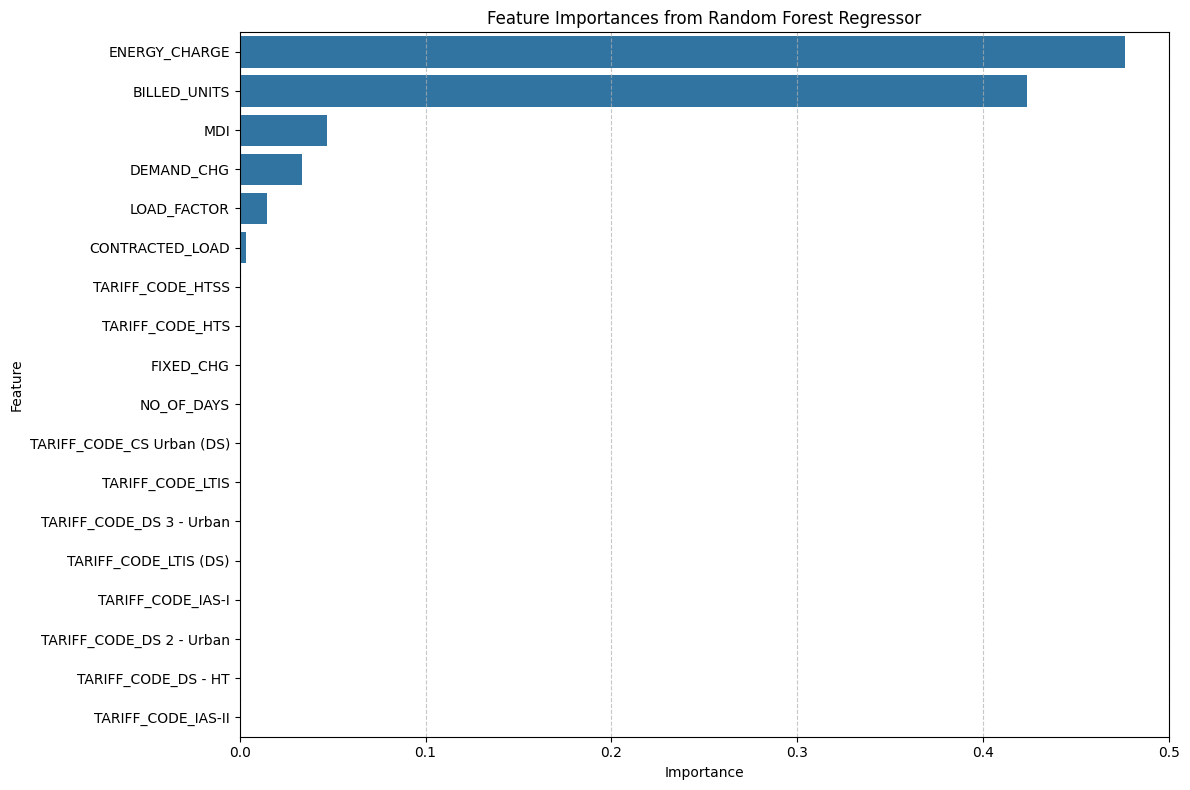

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Create Interaction Terms

In [15]:
# Create interaction terms by multiplying selected features
# We'll use the pre-scaled X DataFrame for this, but could also use original unscaled data and then scale again.
# Given the high importance of ENERGY_CHARGE and BILLED_UNITS, let's create interactions with them

X_with_interactions = X.copy()

# Example 1: Interaction between the top two important features
X_with_interactions['ENERGY_CHARGE_x_BILLED_UNITS'] = X_with_interactions['ENERGY_CHARGE'] * X_with_interactions['BILLED_UNITS']

# Example 2: Interaction between a top feature and another significant numerical feature (MDI)
X_with_interactions['ENERGY_CHARGE_x_MDI'] = X_with_interactions['ENERGY_CHARGE'] * X_with_interactions['MDI']
X_with_interactions['BILLED_UNITS_x_MDI'] = X_with_interactions['BILLED_UNITS'] * X_with_interactions['MDI']

# Example 3: Interaction between another numerical feature and LOAD_FACTOR
X_with_interactions['DEMAND_CHG_x_LOAD_FACTOR'] = X_with_interactions['DEMAND_CHG'] * X_with_interactions['LOAD_FACTOR']


print("DataFrame with new interaction terms:")
display(X_with_interactions.head())

DataFrame with new interaction terms:


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TARIFF_CODE_CS Urban (DS),TARIFF_CODE_DS - HT,...,TARIFF_CODE_HTS,TARIFF_CODE_HTSS,TARIFF_CODE_IAS-I,TARIFF_CODE_IAS-II,TARIFF_CODE_LTIS,TARIFF_CODE_LTIS (DS),ENERGY_CHARGE_x_BILLED_UNITS,ENERGY_CHARGE_x_MDI,BILLED_UNITS_x_MDI,DEMAND_CHG_x_LOAD_FACTOR
0,10.429639,13.191875,20.642342,14.481758,-0.260004,21.548782,-1.328474,12.585792,-0.246123,-0.021467,...,5.519399,-0.048046,-0.021467,-0.021467,-0.367242,-0.122312,444.817337,284.268849,272.311204,182.264396
1,14.237230,17.316257,24.375957,12.651247,-0.260004,22.628040,-1.328474,16.388750,-0.246123,-0.021467,...,-0.181179,20.813457,-0.021467,-0.021467,-0.367242,-0.122312,551.580126,391.832945,422.100321,207.338119
2,0.922684,1.457654,1.948182,11.538468,-0.260004,2.032586,-1.328474,1.211785,-0.246123,-0.021467,...,5.519399,-0.048046,-0.021467,-0.021467,-0.367242,-0.122312,3.959847,2.962808,2.839775,13.982146
3,0.409661,0.625039,0.832500,11.438729,-0.260004,0.867866,-1.328474,0.614055,-0.246123,-0.021467,...,5.519399,-0.048046,-0.021467,-0.021467,-0.367242,-0.122312,0.722498,0.542450,0.520344,7.024004
4,0.890620,2.060731,2.606937,11.147333,-0.260004,2.720310,-1.328474,1.172953,-0.246123,-0.021467,...,5.519399,-0.048046,-0.021467,-0.021467,-0.367242,-0.122312,7.091676,5.605826,5.372194,13.075303


### Analyze Features of Meters with Large Residuals

In [16]:
# 1. Make predictions on the entire preprocessed feature set (X)
Y_pred_all = model.predict(X)

# 2. Calculate residuals
residuals = Y - Y_pred_all

# 3. Combine features, target, and residuals into a single DataFrame for easier analysis
analysis_df = X.copy()
analysis_df['Actual_TOTAL_ASSESSMENT'] = Y
analysis_df['Predicted_TOTAL_ASSESSMENT'] = Y_pred_all
analysis_df['Residual'] = residuals

# Calculate mean and standard deviation of residuals
mean_residual = analysis_df['Residual'].mean()
std_residual = analysis_df['Residual'].std()

# Define a threshold for 'large' residuals (e.g., 2 standard deviations away from the mean)
# Meters with residuals outside this range are flagged as potentially anomalous
threshold_std = 2

flagged_meters_df = analysis_df[
    (analysis_df['Residual'] > (mean_residual + threshold_std * std_residual)) |
    (analysis_df['Residual'] < (mean_residual - threshold_std * std_residual))
]

print(f"Number of records with large residuals (outside {threshold_std} std dev): {len(flagged_meters_df)}")

if not flagged_meters_df.empty:
    print("\nDescriptive statistics for features of meters with large residuals:")
    # Select only the original numerical features for descriptive stats
    original_numerical_features = FEATURE_COLS[:-1]

    # Get the scaled numerical features from X
    scaled_numerical_features = [col for col in X.columns if col in original_numerical_features]

    display(flagged_meters_df[scaled_numerical_features].describe())
else:
    print("No meters identified with unusually large residuals based on the chosen threshold.")

Number of records with large residuals (outside 2 std dev): 21

Descriptive statistics for features of meters with large residuals:


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,7.467161,7.271252,7.189328,5.168745,-0.156596,7.309874,-1.101235,7.527693
std,5.554288,5.921355,6.532692,4.001285,0.487887,6.326432,0.777359,5.626613
min,-0.151458,-0.145661,-0.037479,-0.150596,-0.320377,-0.040383,-1.328474,-0.137623
25%,3.014855,2.908418,2.197837,2.157100,-0.260004,2.293225,-1.328474,3.104840
50%,6.221248,6.488992,5.252356,4.728811,-0.260004,5.482059,-1.328474,6.959924
75%,12.233235,9.910701,10.139476,6.762712,-0.260004,10.584078,-1.328474,11.147894
max,19.848418,18.159463,24.375957,14.481758,1.971943,22.628040,2.002011,18.064823


### Plot Flagged Meters' `ENERGY_CHARGE` vs `Residual`

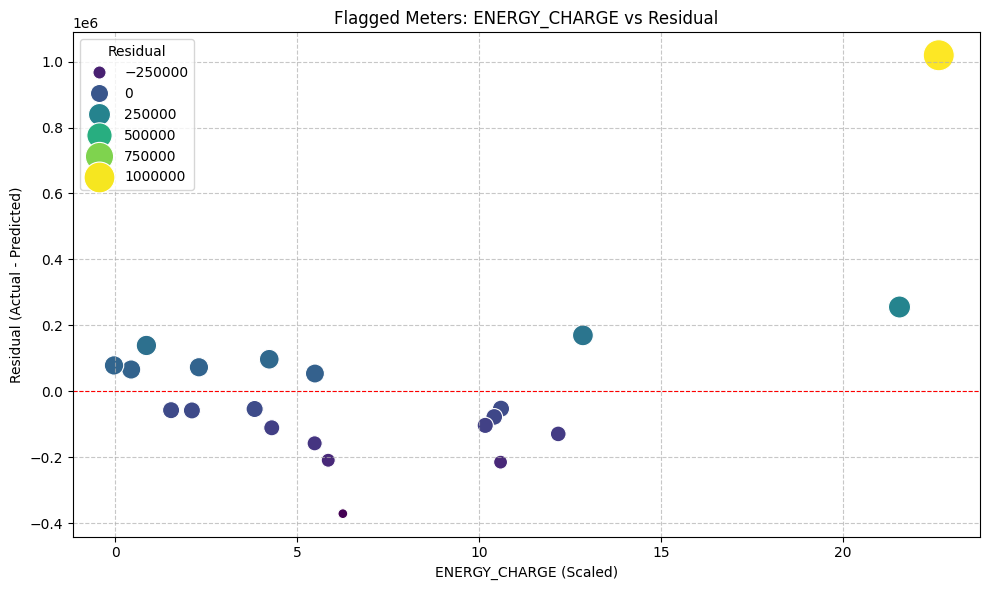

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ENERGY_CHARGE', y='Residual', data=flagged_meters_df, hue='Residual', size='Residual', sizes=(50, 500), palette='viridis')
plt.title('Flagged Meters: ENERGY_CHARGE vs Residual')
plt.xlabel('ENERGY_CHARGE (Scaled)')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a horizontal line at 0 residual
plt.tight_layout()
plt.show()

### `TARIFF_CODE` Distribution for Flagged Meters

In [18]:
print('Distribution of TARIFF_CODE for flagged meters:')
# Get the un-one-hot-encoded TARIFF_CODE from the original df_ml based on flagged_meters_df index
# First, identify the original TARIFF_CODE values for the flagged meters before one-hot encoding

# Reconstruct original TARIFF_CODE for flagged meters if needed, or directly use the one-hot encoded columns
# For simplicity, let's look at the counts of the one-hot encoded features directly from flagged_meters_df

tariff_code_cols = [col for col in flagged_meters_df.columns if col.startswith('TARIFF_CODE_')]

# Calculate the sum for each TARIFF_CODE one-hot encoded column
tariff_distribution = flagged_meters_df[tariff_code_cols].sum()

# Filter for TARIFF_CODEs that actually appeared (sum > 0)
tariff_distribution = tariff_distribution[tariff_distribution > 0]

# Rename indices for better readability (remove 'TARIFF_CODE_')
tariff_distribution.index = tariff_distribution.index.str.replace('TARIFF_CODE_', '')

# Sort for better presentation
tariff_distribution = tariff_distribution.sort_values(ascending=False)
display(tariff_distribution)


# Optional: To get the actual TARIFF_CODE from the original df for flagged meters:
# Note: This requires mapping back or keeping original columns if they weren't dropped after encoding.
# For now, we'll assume the one-hot encoded counts are sufficient to show which tariffs are present.

Distribution of TARIFF_CODE for flagged meters:


,0
HTS,81.703914
HTSS,61.575546
DS - HT,46.153920


### Compare `TARIFF_CODE` Distribution: Flagged vs. Overall

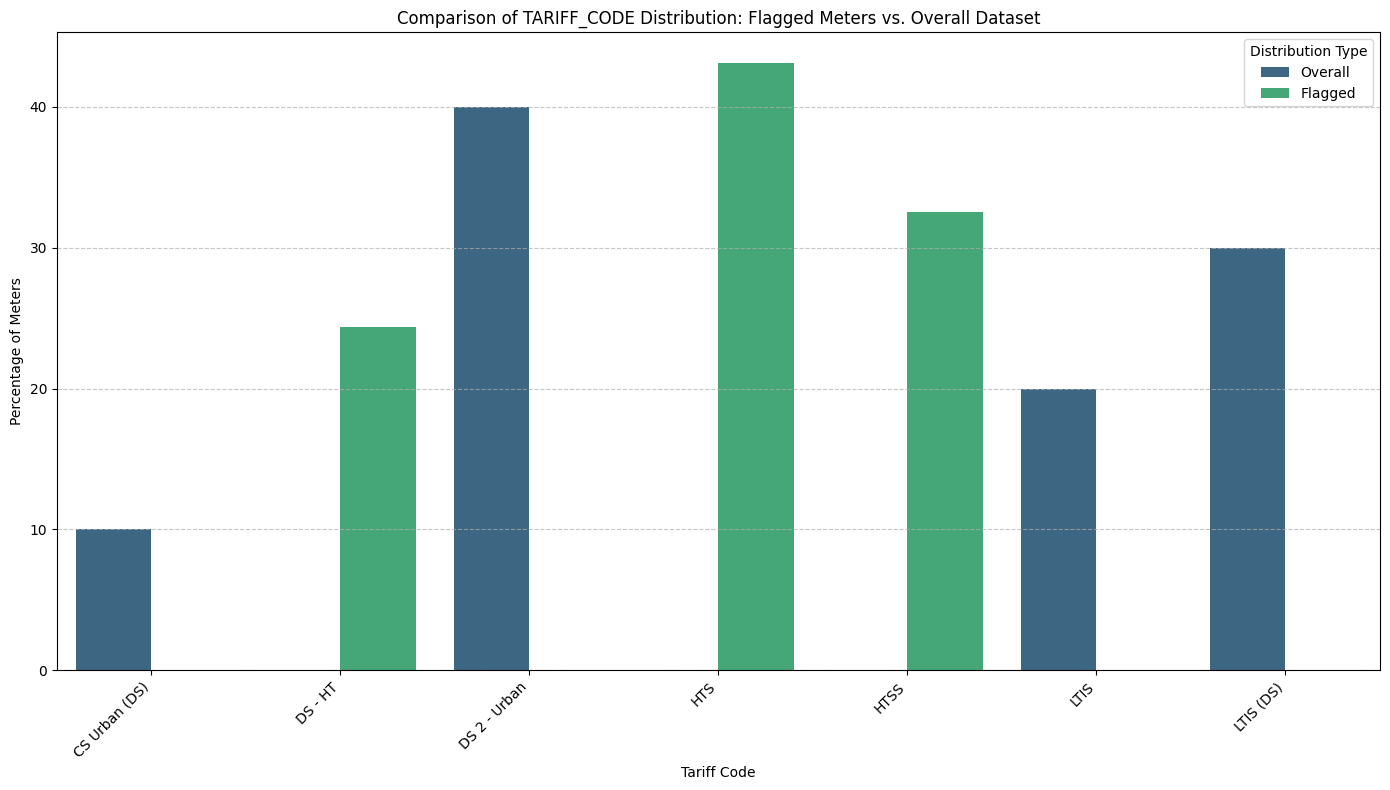

Overall TARIFF_CODE Distribution (Percentage):


,0
DS 2 - Urban,40.0
LTIS (DS),30.0
LTIS,20.0
CS Urban (DS),10.0



Flagged Meters TARIFF_CODE Distribution (Percentage):


,0
HTS,43.130685
HTSS,32.505119
DS - HT,24.364196


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get tariff code columns from the main processed DataFrame X
tariff_code_cols_full = [col for col in X.columns if col.startswith('TARIFF_CODE_')]

# Calculate overall distribution
overall_tariff_distribution = X[tariff_code_cols_full].sum()
overall_tariff_distribution = overall_tariff_distribution[overall_tariff_distribution > 0]
overall_tariff_distribution.index = overall_tariff_distribution.index.str.replace('TARIFF_CODE_', '')
overall_tariff_distribution = overall_tariff_distribution.sort_values(ascending=False)

# Normalize to percentages for better comparison
overall_tariff_distribution_pct = (overall_tariff_distribution / overall_tariff_distribution.sum()) * 100
flagged_tariff_distribution_pct = (tariff_distribution / tariff_distribution.sum()) * 100

# Combine into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Overall': overall_tariff_distribution_pct,
    'Flagged': flagged_tariff_distribution_pct
}).fillna(0)

# Melt the DataFrame for seaborn barplot
comparison_melted_df = comparison_df.reset_index().melt(id_vars='index', var_name='Distribution Type', value_name='Percentage')
comparison_melted_df.rename(columns={'index': 'Tariff Code'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Tariff Code', y='Percentage', hue='Distribution Type', data=comparison_melted_df, palette='viridis')
plt.title('Comparison of TARIFF_CODE Distribution: Flagged Meters vs. Overall Dataset')
plt.xlabel('Tariff Code')
plt.ylabel('Percentage of Meters')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Overall TARIFF_CODE Distribution (Percentage):")
display(overall_tariff_distribution_pct)

print("\nFlagged Meters TARIFF_CODE Distribution (Percentage):")
display(flagged_tariff_distribution_pct)

### Check Data Quality for `HTSS` Tariff Meters

In [20]:
# Filter df_ml for meters with TARIFF_CODE 'HTSS'
df_htss = df_ml[df_ml['TARIFF_CODE'] == 'HTSS'].copy()

print(f"Number of records with TARIFF_CODE 'HTSS': {len(df_htss)}")
display(df_htss.head())

Number of records with TARIFF_CODE 'HTSS': 5


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TARIFF_CODE,TOTAL_ASSESSMENT
1,1800,1717.2,805986,65.46,30.0791,4231426.5,0.0,680940.31,HTSS,5263644.800
11,1750,1800.0,459720,39.14,30.0791,2413530.0,0.0,680817.39,HTSS,3457395.116
25,2500,1753.2,435694,24.95,30.0791,2287391.4,0.0,750000.00,HTSS,3237810.450
26,500,643.2,107892,24.53,30.0791,566433.0,0.0,198231.88,HTSS,910380.082
40,900,234.0,105770,16.86,30.0791,555292.5,0.0,270000.00,HTSS,883335.856


#### Missing Values in `HTSS` Tariff Data

In [21]:
print('Missing values per column in HTSS tariff data:')
display(df_htss.isnull().sum())

Missing values per column in HTSS tariff data:


,0
CONTRACTED_LOAD,0
MDI,0
BILLED_UNITS,0
LOAD_FACTOR,0
NO_OF_DAYS,0
ENERGY_CHARGE,0
FIXED_CHG,0
DEMAND_CHG,0
TARIFF_CODE,0
TOTAL_ASSESSMENT,0


#### Duplicate Rows in `HTSS` Tariff Data

In [22]:
print(f'Number of duplicate rows in HTSS tariff data: {df_htss.duplicated().sum()}')

Number of duplicate rows in HTSS tariff data: 0


#### Data Types and Non-Null Counts for `HTSS` Tariff Data

In [23]:
print('DataFrame Info (data types and non-null counts) for HTSS tariff data:')
df_htss.info()

DataFrame Info (data types and non-null counts) for HTSS tariff data:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 40
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CONTRACTED_LOAD   5 non-null      int64  
 1   MDI               5 non-null      float64
 2   BILLED_UNITS      5 non-null      int64  
 3   LOAD_FACTOR       5 non-null      float64
 4   NO_OF_DAYS        5 non-null      float64
 5   ENERGY_CHARGE     5 non-null      float64
 6   FIXED_CHG         5 non-null      float64
 7   DEMAND_CHG        5 non-null      float64
 8   TARIFF_CODE       5 non-null      object 
 9   TOTAL_ASSESSMENT  5 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 440.0+ bytes


#### Descriptive Statistics for Numerical Columns in `HTSS` Tariff Data

In [24]:
print('Descriptive statistics for numerical columns in HTSS tariff data:')
display(df_htss.describe())

Descriptive statistics for numerical columns in HTSS tariff data:


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TOTAL_ASSESSMENT
count,5.00000,5.000000,5.000000,5.000000,5.0000,5.000000e+00,5.0,5.000000,5.000000e+00
mean,1490.00000,1229.520000,383012.400000,34.188000,30.0791,2.010815e+06,0.0,515997.916000,2.750513e+06
std,792.46451,736.944904,291599.320999,19.244074,0.0000,1.530896e+06,0.0,260105.101822,1.865838e+06
min,500.00000,234.000000,105770.000000,16.860000,30.0791,5.552925e+05,0.0,198231.880000,8.833359e+05
25%,900.00000,643.200000,107892.000000,24.530000,30.0791,5.664330e+05,0.0,270000.000000,9.103801e+05
50%,1750.00000,1717.200000,435694.000000,24.950000,30.0791,2.287391e+06,0.0,680817.390000,3.237810e+06
75%,1800.00000,1753.200000,459720.000000,39.140000,30.0791,2.413530e+06,0.0,680940.310000,3.457395e+06
max,2500.00000,1800.000000,805986.000000,65.460000,30.0791,4.231426e+06,0.0,750000.000000,5.263645e+06


### Check Data Quality for `HTS` Tariff Meters

In [25]:
# Filter df_ml for meters with TARIFF_CODE 'HTS'
df_hts = df_ml[df_ml['TARIFF_CODE'] == 'HTS'].copy()

print(f"Number of records with TARIFF_CODE 'HTS': {len(df_hts)}")
display(df_hts.head())

Number of records with TARIFF_CODE 'HTS': 69


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TARIFF_CODE,TOTAL_ASSESSMENT
0,1325,1312.20,683190,74.82,30.0791,4030821.00,0.0,524246.09,HTS,4395054.520
2,139,159.94,68352,59.77,30.0791,403275.80,0.0,55600.00,HTS,560127.979
3,75,78.18,31658,59.26,30.0791,186785.10,0.0,30971.55,HTS,238339.370
4,135,219.16,90018,57.77,30.0791,531105.49,0.0,54000.00,HTS,789705.269
5,1100,976.00,378000,56.79,30.0791,2230200.00,0.0,342354.40,HTS,2769870.400


#### Missing Values in `HTS` Tariff Data

In [26]:
print('Missing values per column in HTS tariff data:')
display(df_hts.isnull().sum())

Missing values per column in HTS tariff data:


,0
CONTRACTED_LOAD,0
MDI,0
BILLED_UNITS,0
LOAD_FACTOR,0
NO_OF_DAYS,0
ENERGY_CHARGE,0
FIXED_CHG,0
DEMAND_CHG,0
TARIFF_CODE,0
TOTAL_ASSESSMENT,0


#### Duplicate Rows in `HTS` Tariff Data

In [27]:
print(f'Number of duplicate rows in HTS tariff data: {df_hts.duplicated().sum()}')

Number of duplicate rows in HTS tariff data: 0


#### Data Types and Non-Null Counts for `HTS` Tariff Data

In [28]:
print('DataFrame Info (data types and non-null counts) for HTS tariff data:')
df_hts.info()

DataFrame Info (data types and non-null counts) for HTS tariff data:
<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 74
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CONTRACTED_LOAD   69 non-null     int64  
 1   MDI               69 non-null     float64
 2   BILLED_UNITS      69 non-null     int64  
 3   LOAD_FACTOR       69 non-null     float64
 4   NO_OF_DAYS        69 non-null     float64
 5   ENERGY_CHARGE     69 non-null     float64
 6   FIXED_CHG         69 non-null     float64
 7   DEMAND_CHG        69 non-null     float64
 8   TARIFF_CODE       69 non-null     object 
 9   TOTAL_ASSESSMENT  69 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 5.9+ KB


#### Descriptive Statistics for Numerical Columns in `HTS` Tariff Data

In [29]:
print('Descriptive statistics for numerical columns in HTS tariff data:')
display(df_hts.describe())

Descriptive statistics for numerical columns in HTS tariff data:


,CONTRACTED_LOAD,MDI,BILLED_UNITS,LOAD_FACTOR,NO_OF_DAYS,ENERGY_CHARGE,FIXED_CHG,DEMAND_CHG,TOTAL_ASSESSMENT
count,69.00000,69.000000,69.000000,69.000000,6.900000e+01,6.900000e+01,69.0,69.000000,6.900000e+01
mean,375.73913,268.729203,69241.260870,21.501884,3.007910e+01,4.085236e+05,0.0,121291.806377,5.748912e+05
std,401.53751,311.632215,114345.247127,16.506871,2.862993e-14,6.746369e+05,0.0,128776.890116,8.148567e+05
min,75.00000,4.260000,627.000000,0.720000,3.007910e+01,3.700890e+03,0.0,22293.480000,3.752306e+04
25%,135.00000,67.000000,12588.000000,10.580000,3.007910e+01,7.426702e+04,0.0,43156.160000,1.288378e+05
50%,173.00000,127.380000,24880.000000,17.180000,3.007910e+01,1.467924e+05,0.0,55600.000000,2.336756e+05
75%,400.00000,368.700000,75900.000000,28.200000,3.007910e+01,4.478100e+05,0.0,133805.800000,6.901804e+05
max,1700.00000,1312.200000,683190.000000,74.820000,3.007910e+01,4.030821e+06,0.0,524246.090000,4.395055e+06
